PROBLEM 1: Compare the average money spend (PURCHASE_VALUE) between male and female (USER_GENDER) per MPESA Payment system usage (IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY)

In [1]:
#IMPORT THE IMPORTANT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt

#IMPORT THE DATA

money_df= pd.read_csv("Money.csv")

money_df.head(3)

,MERCHANT_CATEGORIZED_AT,HOURS,MONTHS,MINUTES,YEAR,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,10,5,25,2022,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,16,10,18,2021,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,14,5,17,2022,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw


In [6]:
money_df.columns

Index(['MERCHANT_CATEGORIZED_AT', 'HOURS', 'MONTHS', 'MINUTES', 'YEAR',
       'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE',
       'PURCHASED_AT', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE',
       'USER_GENDER', 'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID',
       'Transaction_ID'],
      dtype='object')

In [15]:
#PULL THE DATE TO BE USED FROM THE CSV 
# We need Average Purchase value between Males and Females
# We need to filter the purchase values by including only those from MPESA Payment system

#APPROACH STEP 1
## Start By filtering Transections Made via MPESA

mpesa_transections_df = money_df[money_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"] == True]

mpesa_transections_df[["USER_GENDER","PURCHASE_VALUE","IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"]]



,USER_GENDER,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY
5,Female,14800,True
12,Female,300,True
13,Female,3000,True
15,Male,1000,True
16,Male,19000,True
...,...,...,...
365,Male,250,True
367,Female,2000,True
368,Female,500,True
369,Male,400,True


In [17]:
#APPROACH STEP 2
## Using a group function to group the USER_GENDER by PURCHASE_VALUE

grouped_df = money_df.groupby("USER_GENDER")["PURCHASE_VALUE"].sum()
grouped_df

USER_GENDER
Female     612817
Male      1031695
Name: PURCHASE_VALUE, dtype: int64

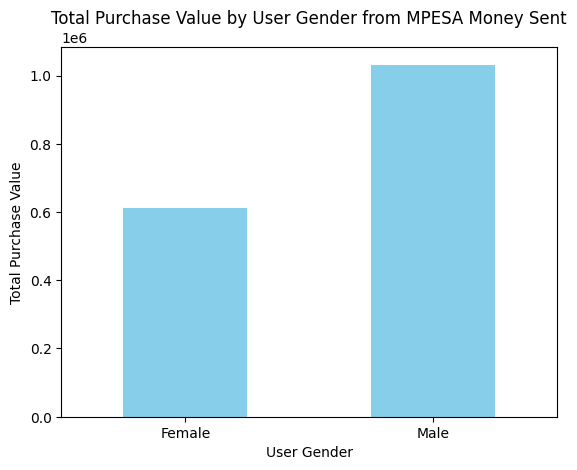

In [30]:
# Plotting a bar chart
grouped_df.plot(kind='bar', color='skyblue')
plt.title('Total Purchase Value by User Gender from MPESA Money Sent')
plt.xlabel('User Gender')
plt.ylabel('Total Purchase Value')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()